In [1]:
import pandas as pd
import seaborn as sns
from sklearn.neural_network import MLPClassifier 
from sklearn import metrics 
import matplotlib.pyplot as plt
from sklearn import model_selection 
import numpy as np
from keras.models import Sequential
from keras.layers import Dense,LSTM,BatchNormalization,Dropout
from keras.wrappers.scikit_learn import  KerasClassifier
from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder

2022-12-09 19:06:44.165481: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-09 19:06:44.353074: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-12-09 19:06:44.353097: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-12-09 19:06:44.999835: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2022-

In [2]:
#1

In [3]:
df = pd.read_csv('Iris.csv')

In [4]:
#2

In [5]:
df.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [6]:
#3

In [7]:
df.shape

(150, 6)

In [8]:
#4

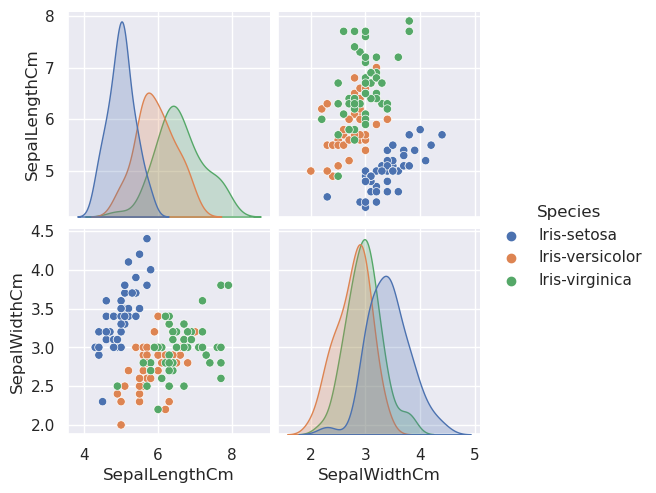

In [9]:
sns.set_theme()
sns.pairplot(
    data=df, vars=("SepalLengthCm","SepalWidthCm") , hue="Species"
)

In [10]:
#5

In [11]:
for i in range(len(df.axes[0])):
  for j in range(len(df.axes[1])):
    if df.iloc[i,j]=="Iris-setosa":
      df.iloc[i,j]=0
    elif df.iloc[i,j]=="Iris-virginica":
      df.iloc[i,j]=1
    elif df.iloc[i,j]=="Iris-versicolor":
      df.iloc[i,j]=2

In [12]:
#6

In [13]:
df.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0
5,6,5.4,3.9,1.7,0.4,0
6,7,4.6,3.4,1.4,0.3,0
7,8,5.0,3.4,1.5,0.2,0
8,9,4.4,2.9,1.4,0.2,0
9,10,4.9,3.1,1.5,0.1,0


In [14]:
#7

In [15]:
x = df.values[:,0:4]
y = df.values[:,5]
xtrain,xtest,ytrain,ytest=model_selection.train_test_split(x,y,train_size=0.7)


In [16]:
#8

In [17]:
xtrain[0:10]

array([[141, 6.7, 3.1, 5.6],
       [26, 5.0, 3.0, 1.6],
       [140, 6.9, 3.1, 5.4],
       [77, 6.8, 2.8, 4.8],
       [123, 7.7, 2.8, 6.7],
       [15, 5.8, 4.0, 1.2],
       [117, 6.5, 3.0, 5.5],
       [5, 5.0, 3.6, 1.4],
       [47, 5.1, 3.8, 1.6],
       [87, 6.7, 3.1, 4.7]], dtype=object)

In [18]:
xtest[0:10]

array([[143, 5.8, 2.7, 5.1],
       [96, 5.7, 3.0, 4.2],
       [50, 5.0, 3.3, 1.4],
       [107, 4.9, 2.5, 4.5],
       [31, 4.8, 3.1, 1.6],
       [133, 6.4, 2.8, 5.6],
       [14, 4.3, 3.0, 1.1],
       [28, 5.2, 3.5, 1.5],
       [121, 6.9, 3.2, 5.7],
       [21, 5.4, 3.4, 1.7]], dtype=object)

In [19]:
#9

In [23]:
rna= MLPClassifier(hidden_layer_sizes=(4,),solver="lbfgs",epsilon=0.07,max_iter=150,alpha=1e-5)
ytrain=ytrain.astype('int')
xtrain=xtrain.astype('int')
rna.fit(xtrain,ytrain)

MLPClassifier(alpha=1e-05, epsilon=0.07, hidden_layer_sizes=(4,), max_iter=150,
              solver='lbfgs')

In [21]:
#10

In [24]:
prediction=rna.predict(xtest)
prediction
metrics.accuracy_score(list(ytest),prediction)

0.9111111111111111

In [25]:
#11

In [26]:
metrics.confusion_matrix(list(ytest),prediction)

array([[16,  0,  3],
       [ 0, 14,  0],
       [ 0,  1, 11]])

In [27]:
#13

In [28]:
rna = MLPClassifier(hidden_layer_sizes=(4,),solver="sgd",epsilon=0.07,max_iter=150,learning_rate_init=0.7,learning_rate= "constant")
ytrain=ytrain.astype('int')
xtrain=xtrain.astype('int')
rna.fit(xtrain,ytrain)


MLPClassifier(epsilon=0.07, hidden_layer_sizes=(4,), learning_rate_init=0.7,
              max_iter=150, solver='sgd')

In [29]:
#14

In [30]:
rna= MLPClassifier(hidden_layer_sizes=(4,),solver="sgd",epsilon=0.07,max_iter=150,learning_rate_init=0.2,learning_rate= "constant",)
ytrain=ytrain.astype('int')
xtrain=xtrain.astype('int')
rna.fit(xtrain,ytrain)


MLPClassifier(epsilon=0.07, hidden_layer_sizes=(4,), learning_rate_init=0.2,
              max_iter=150, solver='sgd')

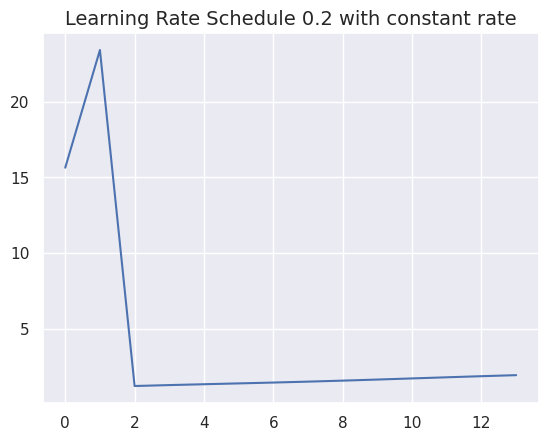

In [31]:
plt.plot(rna.loss_curve_)
plt.title("Learning Rate Schedule 0.2 with constant rate",fontsize=14)
plt.show()

In [32]:
rna1= MLPClassifier(hidden_layer_sizes=(4,),solver="sgd",epsilon=0.07,max_iter=150,learning_rate_init=0.2,learning_rate= "invscaling",)
ytrain=ytrain.astype('int')
xtrain=xtrain.astype('int')
rna1.fit(xtrain,ytrain)

MLPClassifier(epsilon=0.07, hidden_layer_sizes=(4,), learning_rate='invscaling',
              learning_rate_init=0.2, max_iter=150, solver='sgd')

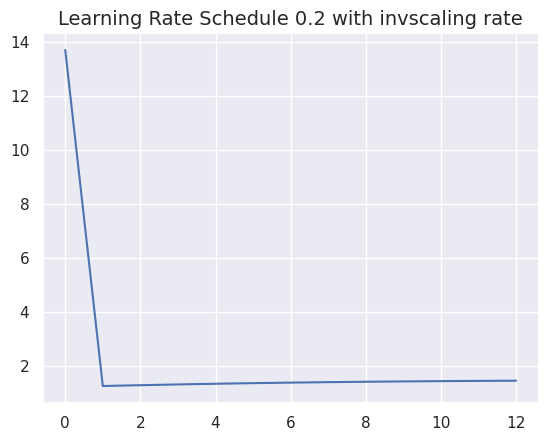

In [33]:
plt.plot(rna1.loss_curve_)
plt.title("Learning Rate Schedule 0.2 with invscaling rate",fontsize=14)
plt.show()

In [34]:
rna= MLPClassifier(hidden_layer_sizes=(4,),solver="sgd",epsilon=0.07,max_iter=150,learning_rate_init=0.7,learning_rate= "invscaling",)
ytrain=ytrain.astype('int')
xtrain=xtrain.astype('int')
rna.fit(xtrain,ytrain)

MLPClassifier(epsilon=0.07, hidden_layer_sizes=(4,), learning_rate='invscaling',
              learning_rate_init=0.7, max_iter=150, solver='sgd')

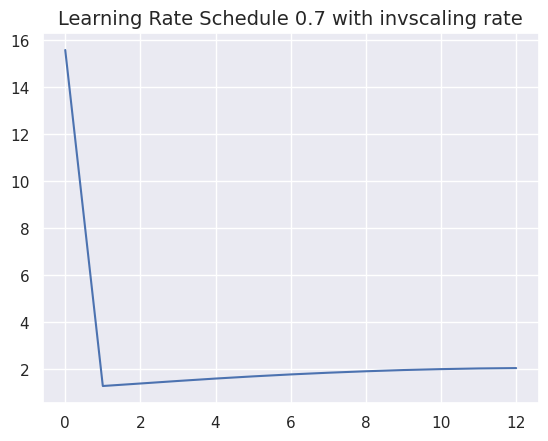

In [35]:
plt.plot(rna.loss_curve_)
plt.title("Learning Rate Schedule 0.7 with invscaling rate",fontsize=14)
plt.show()

In [36]:
#15

In [37]:
rna1= MLPClassifier(hidden_layer_sizes=(4,),solver="lbfgs",epsilon=0.07,max_iter=1500,alpha=1e-5)
xtrain,xtest,ytrain,ytest=model_selection.train_test_split(x,y,train_size=0.7)
ytrain=ytrain.astype('int')
xtrain=xtrain.astype('int')


In [38]:
rna1.fit(xtrain,ytrain)

MLPClassifier(alpha=1e-05, epsilon=0.07, hidden_layer_sizes=(4,), max_iter=1500,
              solver='lbfgs')

In [39]:
prediction=rna1.predict(xtrain)
prediction

array([2, 1, 0, 0, 2, 1, 2, 1, 0, 2, 1, 1, 1, 2, 0, 0, 1, 1, 2, 0, 0, 0,
       2, 0, 0, 2, 0, 1, 2, 2, 0, 1, 2, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       2, 2, 1, 2, 2, 1, 2, 1, 2, 1, 2, 0, 2, 2, 1, 1, 0, 2, 1, 2, 1, 2,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 2, 0, 2, 2, 0, 2, 0, 0, 2, 2, 0, 2, 1,
       2, 1, 2, 1, 0, 1, 0, 1, 2, 2, 1, 2, 0, 0, 2, 0, 2])

In [40]:
ytrain

array([2, 1, 0, 0, 2, 1, 2, 1, 0, 2, 1, 1, 1, 2, 0, 0, 1, 1, 2, 0, 0, 0,
       2, 0, 0, 2, 0, 1, 2, 2, 0, 1, 2, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       2, 2, 1, 2, 2, 1, 2, 1, 2, 1, 2, 0, 2, 2, 1, 1, 0, 2, 1, 2, 1, 2,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 2, 0, 2, 2, 0, 2, 0, 0, 2, 2, 0, 2, 1,
       2, 1, 2, 1, 0, 1, 0, 1, 2, 2, 1, 2, 0, 0, 2, 0, 2])

In [41]:
metrics.accuracy_score(list(ytrain),prediction)


1.0

In [42]:
metrics.confusion_matrix(list(ytrain),prediction)

array([[35,  0,  0],
       [ 0, 33,  0],
       [ 0,  0, 37]])

In [43]:
#16


In [44]:
x=df.values[:,0:4]
y=df.values[:,5]
x=x.reshape(x.shape+(1,))
x = np.asarray(x).astype('float32')
y=np_utils.to_categorical(df.values[:,5])
xtrain,xtest,ytrain,ytest=model_selection.train_test_split(x,y,train_size=0.8)

In [45]:
model1 = Sequential()
model1.add(Dense(4,input_shape=(4,),activation='relu'))
model1.add(Dense(3,activation='softmax'))
model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
iris_model = model1.fit(xtrain, ytrain, epochs=500, batch_size=7)

Epoch 1/500


2022-12-09 19:08:03.453502: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-12-09 19:08:03.453524: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2022-12-09 19:08:03.453545: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (pop-os): /proc/driver/nvidia/version does not exist
2022-12-09 19:08:03.453723: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


18/18 [==============================] - 0s 1ms/step - loss: 17.2726 - accuracy: 0.3333
Epoch 2/500
18/18 [==============================] - 0s 1ms/step - loss: 12.0296 - accuracy: 0.3333
Epoch 3/500
18/18 [==============================] - 0s 1ms/step - loss: 7.4114 - accuracy: 0.3333
Epoch 4/500
18/18 [==============================] - 0s 2ms/step - loss: 4.3925 - accuracy: 0.4333
Epoch 5/500
18/18 [==============================] - 0s 2ms/step - loss: 4.0935 - accuracy: 0.4083
Epoch 6/500
18/18 [==============================] - 0s 2ms/step - loss: 3.6720 - accuracy: 0.4667
Epoch 7/500
18/18 [==============================] - 0s 2ms/step - loss: 3.3008 - accuracy: 0.5250
Epoch 8/500
18/18 [==============================] - 0s 2ms/step - loss: 2.9528 - accuracy: 0.5250
Epoch 9/500
18/18 [==============================] - 0s 2ms/step - loss: 2.5824 - accuracy: 0.4917
Epoch 10/500
18/18 [==============================] - 0s 2ms/step - loss: 2.2113 - accuracy: 0.5000
Epoch 11/500
18/18 

18/18 [==============================] - 0s 1ms/step - loss: 0.4082 - accuracy: 0.8250
Epoch 84/500
18/18 [==============================] - 0s 1ms/step - loss: 0.4030 - accuracy: 0.8167
Epoch 85/500
18/18 [==============================] - 0s 1ms/step - loss: 0.4084 - accuracy: 0.8667
Epoch 86/500
18/18 [==============================] - 0s 1ms/step - loss: 0.4041 - accuracy: 0.8417
Epoch 87/500
18/18 [==============================] - 0s 1ms/step - loss: 0.4116 - accuracy: 0.8500
Epoch 88/500
18/18 [==============================] - 0s 2ms/step - loss: 0.4076 - accuracy: 0.8333
Epoch 89/500
18/18 [==============================] - 0s 2ms/step - loss: 0.3969 - accuracy: 0.8500
Epoch 90/500
18/18 [==============================] - 0s 1ms/step - loss: 0.4069 - accuracy: 0.8667
Epoch 91/500
18/18 [==============================] - 0s 1ms/step - loss: 0.4095 - accuracy: 0.8250
Epoch 92/500
18/18 [==============================] - 0s 1ms/step - loss: 0.3938 - accuracy: 0.8250
Epoch 93/500


18/18 [==============================] - 0s 1ms/step - loss: 0.3327 - accuracy: 0.8583
Epoch 165/500
18/18 [==============================] - 0s 1ms/step - loss: 0.3139 - accuracy: 0.9000
Epoch 166/500
18/18 [==============================] - 0s 1ms/step - loss: 0.3003 - accuracy: 0.8667
Epoch 167/500
18/18 [==============================] - 0s 1ms/step - loss: 0.3004 - accuracy: 0.8750
Epoch 168/500
18/18 [==============================] - 0s 1ms/step - loss: 0.3628 - accuracy: 0.8583
Epoch 169/500
18/18 [==============================] - 0s 2ms/step - loss: 0.3115 - accuracy: 0.8667
Epoch 170/500
18/18 [==============================] - 0s 1ms/step - loss: 0.2919 - accuracy: 0.8750
Epoch 171/500
18/18 [==============================] - 0s 1ms/step - loss: 0.3081 - accuracy: 0.8667
Epoch 172/500
18/18 [==============================] - 0s 1ms/step - loss: 0.3113 - accuracy: 0.8417
Epoch 173/500
18/18 [==============================] - 0s 1ms/step - loss: 0.3157 - accuracy: 0.8750
Epoc

18/18 [==============================] - 0s 1ms/step - loss: 0.2967 - accuracy: 0.8500
Epoch 246/500
18/18 [==============================] - 0s 1ms/step - loss: 0.3354 - accuracy: 0.8583
Epoch 247/500
18/18 [==============================] - 0s 1ms/step - loss: 0.2822 - accuracy: 0.8833
Epoch 248/500
18/18 [==============================] - 0s 1ms/step - loss: 0.2622 - accuracy: 0.8750
Epoch 249/500
18/18 [==============================] - 0s 1ms/step - loss: 0.2471 - accuracy: 0.8833
Epoch 250/500
18/18 [==============================] - 0s 1ms/step - loss: 0.2498 - accuracy: 0.8833
Epoch 251/500
18/18 [==============================] - 0s 1ms/step - loss: 0.2530 - accuracy: 0.8750
Epoch 252/500
18/18 [==============================] - 0s 1ms/step - loss: 0.2528 - accuracy: 0.9000
Epoch 253/500
18/18 [==============================] - 0s 1ms/step - loss: 0.2640 - accuracy: 0.8917
Epoch 254/500
18/18 [==============================] - 0s 1ms/step - loss: 0.2441 - accuracy: 0.8750
Epoc

18/18 [==============================] - 0s 1ms/step - loss: 0.2215 - accuracy: 0.8667
Epoch 327/500
18/18 [==============================] - 0s 1ms/step - loss: 0.2556 - accuracy: 0.9000
Epoch 328/500
18/18 [==============================] - 0s 1ms/step - loss: 0.2349 - accuracy: 0.8917
Epoch 329/500
18/18 [==============================] - 0s 1ms/step - loss: 0.2270 - accuracy: 0.8917
Epoch 330/500
18/18 [==============================] - 0s 1ms/step - loss: 0.2240 - accuracy: 0.9083
Epoch 331/500
18/18 [==============================] - 0s 1ms/step - loss: 0.2141 - accuracy: 0.8833
Epoch 332/500
18/18 [==============================] - 0s 1ms/step - loss: 0.2125 - accuracy: 0.8833
Epoch 333/500
18/18 [==============================] - 0s 1ms/step - loss: 0.2137 - accuracy: 0.9000
Epoch 334/500
18/18 [==============================] - 0s 1ms/step - loss: 0.2352 - accuracy: 0.8667
Epoch 335/500
18/18 [==============================] - 0s 1ms/step - loss: 0.2217 - accuracy: 0.9333
Epoc

18/18 [==============================] - 0s 2ms/step - loss: 0.1779 - accuracy: 0.9333
Epoch 408/500
18/18 [==============================] - 0s 2ms/step - loss: 0.1910 - accuracy: 0.9167
Epoch 409/500
18/18 [==============================] - 0s 1ms/step - loss: 0.1865 - accuracy: 0.9250
Epoch 410/500
18/18 [==============================] - 0s 1ms/step - loss: 0.2120 - accuracy: 0.8750
Epoch 411/500
18/18 [==============================] - 0s 1ms/step - loss: 0.1764 - accuracy: 0.9250
Epoch 412/500
18/18 [==============================] - 0s 1ms/step - loss: 0.1868 - accuracy: 0.9083
Epoch 413/500
18/18 [==============================] - 0s 1ms/step - loss: 0.1892 - accuracy: 0.9417
Epoch 414/500
18/18 [==============================] - 0s 1ms/step - loss: 0.2142 - accuracy: 0.8917
Epoch 415/500
18/18 [==============================] - 0s 1ms/step - loss: 0.1842 - accuracy: 0.9333
Epoch 416/500
18/18 [==============================] - 0s 1ms/step - loss: 0.1755 - accuracy: 0.9250
Epoc

18/18 [==============================] - 0s 1ms/step - loss: 0.1578 - accuracy: 0.9333
Epoch 489/500
18/18 [==============================] - 0s 1ms/step - loss: 0.1488 - accuracy: 0.9417
Epoch 490/500
18/18 [==============================] - 0s 1ms/step - loss: 0.1542 - accuracy: 0.9417
Epoch 491/500
18/18 [==============================] - 0s 1ms/step - loss: 0.1433 - accuracy: 0.9500
Epoch 492/500
18/18 [==============================] - 0s 1ms/step - loss: 0.1462 - accuracy: 0.9417
Epoch 493/500
18/18 [==============================] - 0s 1ms/step - loss: 0.1497 - accuracy: 0.9333
Epoch 494/500
18/18 [==============================] - 0s 1ms/step - loss: 0.1442 - accuracy: 0.9417
Epoch 495/500
18/18 [==============================] - 0s 1ms/step - loss: 0.1498 - accuracy: 0.9333
Epoch 496/500
18/18 [==============================] - 0s 1ms/step - loss: 0.1646 - accuracy: 0.9167
Epoch 497/500
18/18 [==============================] - 0s 2ms/step - loss: 0.1546 - accuracy: 0.9250
Epoc

In [46]:
pred= model1.predict(xtest)
y_test=np.argmax(ytest,axis=1)
y_pred=np.argmax(pred,axis=1)
y_pred

1/1 [==============================] - 0s 62ms/step


array([2, 2, 2, 1, 2, 0, 2, 2, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 2, 1, 1, 2,
       1, 2, 0, 0, 1, 2, 0, 2])

In [47]:
y_test

array([1, 2, 1, 1, 2, 0, 2, 1, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 2, 1, 1, 2,
       1, 2, 0, 0, 1, 2, 0, 2])

In [48]:
_,test=model1.evaluate(xtest,ytest)

1/1 [==============================] - 0s 141ms/step - loss: 0.1593 - accuracy: 0.9000


In [49]:
model=Sequential()

model.add(LSTM(4))
model.add(Dense(3,activation="softmax"))

model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=['accuracy'])
model.fit(xtrain,ytrain,epochs=500,verbose=1)

Epoch 1/500
4/4 [==============================] - 2s 4ms/step - loss: 1.1619 - accuracy: 0.3167
Epoch 2/500
4/4 [==============================] - 0s 4ms/step - loss: 1.1570 - accuracy: 0.3167
Epoch 3/500
4/4 [==============================] - 0s 4ms/step - loss: 1.1526 - accuracy: 0.3167
Epoch 4/500
4/4 [==============================] - 0s 5ms/step - loss: 1.1479 - accuracy: 0.3167
Epoch 5/500
4/4 [==============================] - 0s 5ms/step - loss: 1.1443 - accuracy: 0.3167
Epoch 6/500
4/4 [==============================] - 0s 5ms/step - loss: 1.1399 - accuracy: 0.3167
Epoch 7/500
4/4 [==============================] - 0s 4ms/step - loss: 1.1359 - accuracy: 0.3167
Epoch 8/500
4/4 [==============================] - 0s 4ms/step - loss: 1.1328 - accuracy: 0.3167
Epoch 9/500
4/4 [==============================] - 0s 4ms/step - loss: 1.1294 - accuracy: 0.3167
Epoch 10/500
4/4 [==============================] - 0s 4ms/step - loss: 1.1261 - accuracy: 0.3167
Epoch 11/500
4/4 [===========

4/4 [==============================] - 0s 5ms/step - loss: 1.0227 - accuracy: 0.6583
Epoch 85/500
4/4 [==============================] - 0s 5ms/step - loss: 1.0216 - accuracy: 0.6583
Epoch 86/500
4/4 [==============================] - 0s 4ms/step - loss: 1.0205 - accuracy: 0.6583
Epoch 87/500
4/4 [==============================] - 0s 4ms/step - loss: 1.0192 - accuracy: 0.6667
Epoch 88/500
4/4 [==============================] - 0s 4ms/step - loss: 1.0181 - accuracy: 0.6667
Epoch 89/500
4/4 [==============================] - 0s 5ms/step - loss: 1.0169 - accuracy: 0.6667
Epoch 90/500
4/4 [==============================] - 0s 5ms/step - loss: 1.0157 - accuracy: 0.6667
Epoch 91/500
4/4 [==============================] - 0s 4ms/step - loss: 1.0146 - accuracy: 0.6667
Epoch 92/500
4/4 [==============================] - 0s 4ms/step - loss: 1.0134 - accuracy: 0.6667
Epoch 93/500
4/4 [==============================] - 0s 4ms/step - loss: 1.0123 - accuracy: 0.6667
Epoch 94/500
4/4 [===============

4/4 [==============================] - 0s 4ms/step - loss: 0.8446 - accuracy: 0.8500
Epoch 168/500
4/4 [==============================] - 0s 4ms/step - loss: 0.8394 - accuracy: 0.8417
Epoch 169/500
4/4 [==============================] - 0s 4ms/step - loss: 0.8347 - accuracy: 0.8250
Epoch 170/500
4/4 [==============================] - 0s 4ms/step - loss: 0.8295 - accuracy: 0.8083
Epoch 171/500
4/4 [==============================] - 0s 4ms/step - loss: 0.8245 - accuracy: 0.7750
Epoch 172/500
4/4 [==============================] - 0s 4ms/step - loss: 0.8197 - accuracy: 0.7667
Epoch 173/500
4/4 [==============================] - 0s 4ms/step - loss: 0.8147 - accuracy: 0.7583
Epoch 174/500
4/4 [==============================] - 0s 4ms/step - loss: 0.8094 - accuracy: 0.7417
Epoch 175/500
4/4 [==============================] - 0s 4ms/step - loss: 0.8041 - accuracy: 0.7417
Epoch 176/500
4/4 [==============================] - 0s 4ms/step - loss: 0.7989 - accuracy: 0.7417
Epoch 177/500
4/4 [=====

4/4 [==============================] - 0s 4ms/step - loss: 0.5434 - accuracy: 0.8917
Epoch 250/500
4/4 [==============================] - 0s 4ms/step - loss: 0.5416 - accuracy: 0.8833
Epoch 251/500
4/4 [==============================] - 0s 4ms/step - loss: 0.5398 - accuracy: 0.8917
Epoch 252/500
4/4 [==============================] - 0s 4ms/step - loss: 0.5380 - accuracy: 0.8917
Epoch 253/500
4/4 [==============================] - 0s 4ms/step - loss: 0.5363 - accuracy: 0.8917
Epoch 254/500
4/4 [==============================] - 0s 4ms/step - loss: 0.5344 - accuracy: 0.8917
Epoch 255/500
4/4 [==============================] - 0s 4ms/step - loss: 0.5327 - accuracy: 0.8917
Epoch 256/500
4/4 [==============================] - 0s 4ms/step - loss: 0.5311 - accuracy: 0.8917
Epoch 257/500
4/4 [==============================] - 0s 4ms/step - loss: 0.5293 - accuracy: 0.8917
Epoch 258/500
4/4 [==============================] - 0s 4ms/step - loss: 0.5278 - accuracy: 0.8917
Epoch 259/500
4/4 [=====

4/4 [==============================] - 0s 4ms/step - loss: 0.4402 - accuracy: 0.9667
Epoch 332/500
4/4 [==============================] - 0s 4ms/step - loss: 0.4393 - accuracy: 0.9667
Epoch 333/500
4/4 [==============================] - 0s 4ms/step - loss: 0.4383 - accuracy: 0.9667
Epoch 334/500
4/4 [==============================] - 0s 4ms/step - loss: 0.4373 - accuracy: 0.9667
Epoch 335/500
4/4 [==============================] - 0s 4ms/step - loss: 0.4365 - accuracy: 0.9667
Epoch 336/500
4/4 [==============================] - 0s 4ms/step - loss: 0.4355 - accuracy: 0.9667
Epoch 337/500
4/4 [==============================] - 0s 4ms/step - loss: 0.4347 - accuracy: 0.9667
Epoch 338/500
4/4 [==============================] - 0s 4ms/step - loss: 0.4336 - accuracy: 0.9667
Epoch 339/500
4/4 [==============================] - 0s 4ms/step - loss: 0.4327 - accuracy: 0.9667
Epoch 340/500
4/4 [==============================] - 0s 4ms/step - loss: 0.4318 - accuracy: 0.9667
Epoch 341/500
4/4 [=====

4/4 [==============================] - 0s 4ms/step - loss: 0.3725 - accuracy: 0.9833
Epoch 414/500
4/4 [==============================] - 0s 4ms/step - loss: 0.3715 - accuracy: 0.9833
Epoch 415/500
4/4 [==============================] - 0s 4ms/step - loss: 0.3708 - accuracy: 0.9833
Epoch 416/500
4/4 [==============================] - 0s 4ms/step - loss: 0.3702 - accuracy: 0.9917
Epoch 417/500
4/4 [==============================] - 0s 4ms/step - loss: 0.3693 - accuracy: 0.9917
Epoch 418/500
4/4 [==============================] - 0s 4ms/step - loss: 0.3688 - accuracy: 0.9833
Epoch 419/500
4/4 [==============================] - 0s 4ms/step - loss: 0.3679 - accuracy: 0.9833
Epoch 420/500
4/4 [==============================] - 0s 4ms/step - loss: 0.3672 - accuracy: 0.9833
Epoch 421/500
4/4 [==============================] - 0s 4ms/step - loss: 0.3665 - accuracy: 0.9833
Epoch 422/500
4/4 [==============================] - 0s 4ms/step - loss: 0.3657 - accuracy: 0.9917
Epoch 423/500
4/4 [=====

4/4 [==============================] - 0s 3ms/step - loss: 0.3169 - accuracy: 0.9833
Epoch 496/500
4/4 [==============================] - 0s 4ms/step - loss: 0.3164 - accuracy: 0.9833
Epoch 497/500
4/4 [==============================] - 0s 3ms/step - loss: 0.3154 - accuracy: 0.9917
Epoch 498/500
4/4 [==============================] - 0s 3ms/step - loss: 0.3148 - accuracy: 0.9917
Epoch 499/500
4/4 [==============================] - 0s 4ms/step - loss: 0.3143 - accuracy: 0.9833
Epoch 500/500
4/4 [==============================] - 0s 4ms/step - loss: 0.3135 - accuracy: 0.9833


In [50]:
_,test=model.evaluate(xtest,ytest)

1/1 [==============================] - 0s 366ms/step - loss: 0.2832 - accuracy: 0.9333
